In [2]:
from functions import *
import pandas as pd
t_vals = [323.15, 328.15, 333.15]
Pw_vals = [0.12352, 0.15762, 0.19946] # from NIST, bar
Pm_vals = [0.55684, 0.68928, 0.84713] # from NIST, bar
water = Water()
methanol = Methanol()
table1 = pd.DataFrame(columns = ['Fluid', 'Temp (K)', 'PR-Psat (bar)', 'Fugacity Coeff'])
table2 = pd.DataFrame(columns = ['Fluid', 'Temp (K)', 'Antoine-Psat (bar)', 'NIST-Psat (bar)', 'PR-Antoine Diff (%)', 'PR-NIST Diff (%)'])
for i in t_vals:
    PR_w, phi_w = water.calc_pvap(i, 10000)
    PR_m, phi_m = methanol.calc_pvap(i, 10000)
    table1.at[t_vals.index(i), 'Fluid'] = 'Water'
    table1.at[t_vals.index(i), 'Temp (K)'] = i
    table1.at[t_vals.index(i), 'PR-Psat (bar)'] = PR_w
    table1.at[t_vals.index(i), 'Fugacity Coeff'] = phi_w

    table1.at[t_vals.index(i)+3, 'Fluid'] = 'Methanol'
    table1.at[t_vals.index(i)+3, 'Temp (K)'] = i
    table1.at[t_vals.index(i)+3, 'PR-Psat (bar)'] = PR_m
    table1.at[t_vals.index(i)+3, 'Fugacity Coeff'] = phi_m

    table2.at[t_vals.index(i), 'Fluid'] = 'Water'
    table2.at[t_vals.index(i), 'Temp (K)'] = i
    table2.at[t_vals.index(i), 'Antoine-Psat (bar)'] = water.antoine(i)
    table2.at[t_vals.index(i), 'NIST-Psat (bar)'] = Pw_vals[t_vals.index(i)]
    table2.at[t_vals.index(i), 'PR-Antoine Diff (%)'] = abs((PR_w - water.antoine(i))/water.antoine(i))*100
    table2.at[t_vals.index(i), 'PR-NIST Diff (%)'] = abs((PR_w - Pw_vals[t_vals.index(i)])/Pw_vals[t_vals.index(i)])*100

    table2.at[t_vals.index(i)+3, 'Fluid'] = 'Methanol'
    table2.at[t_vals.index(i)+3, 'Temp (K)'] = i
    table2.at[t_vals.index(i)+3, 'Antoine-Psat (bar)'] = methanol.antoine(i)
    table2.at[t_vals.index(i)+3, 'NIST-Psat (bar)'] = Pm_vals[t_vals.index(i)]
    table2.at[t_vals.index(i)+3, 'PR-Antoine Diff (%)'] = abs((PR_m - methanol.antoine(i))/methanol.antoine(i))*100
    table2.at[t_vals.index(i)+3, 'PR-NIST Diff (%)'] = abs((PR_m - Pm_vals[t_vals.index(i)])/Pm_vals[t_vals.index(i)])*100

Task-1

In [3]:
# Saturation Pressure and Fugacity Coefficients Computed Using Peng-Robinson EOS
table1

,Fluid,Temp (K),PR-Psat (bar),Fugacity Coeff
0,Water,323.15,0.109657,0.998638
3,Methanol,323.15,0.553361,0.988815
1,Water,328.15,0.14111,0.998315
4,Methanol,328.15,0.690179,0.986655
2,Water,333.15,0.179994,0.997934
5,Methanol,333.15,0.853859,0.9842


Considering the fugacity coefficients determined above, the vapor phase, although not exactly ideal (its coefficient is not 1), could be considered as close to ideal with minimal error. 

In [4]:
# Comparison of Saturation Pressure Computed Using Peng-Robinson EOS, Antoine Equation, and NIST Data
table2

,Fluid,Temp (K),Antoine-Psat (bar),NIST-Psat (bar),PR-Antoine Diff (%),PR-NIST Diff (%)
0,Water,323.15,0.123271,0.12352,11.044126,11.223176
3,Methanol,323.15,0.555772,0.55684,0.433803,0.624831
1,Water,328.15,0.157376,0.15762,10.335929,10.474551
4,Methanol,328.15,0.688128,0.68928,0.298133,0.130466
2,Water,333.15,0.199214,0.19946,9.648324,9.759585
5,Methanol,333.15,0.845936,0.84713,0.936633,0.794371


The saturation pressures determined from the Peng-Robinson equation of state are close to the values from NIST and Antoine equation for methanol, with percent differences less than 1%. For water, the percent differences are much higher, with percent differences around 10%. This indicates that the Peng-Robinson equation of state is accurate for methanol, but not as accurate for water-- this could be due to the fact that water has strong hydrogen bonding and high polarity which is not accounted for in the Peng-Robinson equation of state.

Task 2

For the 3 Suffix Margules, coefficient A is 1620.75 and coefficient B is -470.96

For the Wilson model, coefficient A(ab) is 0.276406, coefficient A(ba) is 1.29203.

For the NRTL model, coefficient G(ab) is 1.18484, coeficient G(ba) is 0.731911, coefficient Tau(ab) is -1.30021, and coefficient Tau(ba) is 2.39249. 

The energetic parameters from the Wilson model are 1211.696 J/mol for a-b (methanol-water) and 1554.686 J/mol for b-a (water-methanol). 

![energy_para](images/energy_para.png)

The energetic parameters determined from the Wilson model both being positive and large indicate that the methanol-water mixture is not ideal and unfavorable interactions (repulsion) will lead to a less stable mixture compared to water-water mixture and methanol-methanol mixture. The deviation for methanol-methanol is larger.

The activity coefficients determined were 1.042 for methanol (a) and 1.338 for water (b).
![activity_coeff](images/activity_coeff.png)

The total pressure of the system was determined to be 0.426 bar, and the composition of the vapor phase was 0.880 methanol and 0.120 water. The vapor was assumed to be ideal, and equi-fugacity was assumed.

![pressure](images/sat_pressure.png)

iv. Excess gibbs energy using the Wilson Model (part ii) as a function of methanol mole 
fraction (x-axis of 0 to 1). 

Text(0.5, 1.0, 'Excess Gibbs Energy vs. Methanol Mole Fraction')

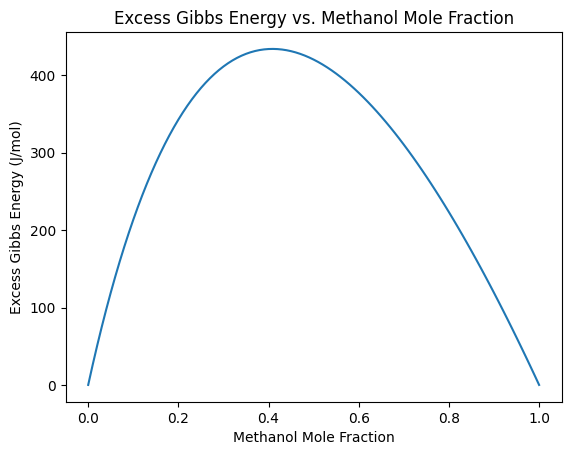

In [3]:
from functions import *
import matplotlib.pyplot as plt
m_mole_frac = [i/100 for i in range(0, 101, 1)]
ge = []
for i in range(len(m_mole_frac)):
    ge.append(g_excess(323.15, m_mole_frac[i], 0.276406, 1.29203))

plt.plot(m_mole_frac, ge)
plt.xlabel('Methanol Mole Fraction')
plt.ylabel('Excess Gibbs Energy (J/mol)')
plt.title('Excess Gibbs Energy vs. Methanol Mole Fraction')

Text(0.5, 1.0, 'Excess Enthalpy vs. Methanol Mole Fraction')

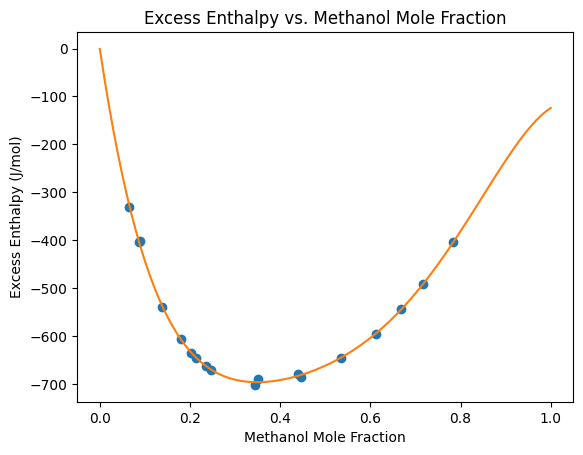

In [4]:
import numpy as np
x_meth = [0.065, 0.087, 0.089, 0.138, 0.180, 0.202, 0.214, 0.236, 0.247, 0.344, 0.350, 0.440, 0.446, 0.535, 0.612, 0.668, 0.717, 0.784]
He = [330, 404, 402, 540, 607, 635, 645, 663, 670, 702, 689, 680, 685, 645, 596, 543, 492, 404]
He = [i*-1 for i in He]
poly = np.polyfit(x_meth, He, deg=5)
plt.plot(x_meth, He, 'o')
plt.plot(m_mole_frac, np.polyval(poly, m_mole_frac))
plt.xlabel('Methanol Mole Fraction')
plt.ylabel('Excess Enthalpy (J/mol)')
plt.title('Excess Enthalpy vs. Methanol Mole Fraction')

In [13]:
h1 = np.polyval(poly, 0.60)
h3 = np.polyval(poly, 0.4028)
print(h1, h3)

-603.8997246863115 -691.3297979812318


About 100 KW of heat is supplied to the tank. To keep a constant temperature, the tank must be warmed.

![flash tank](images\flash.png)